# Estimación de distribución de probabilidad

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.stats import norm
from numpy import hstack
from sklearn.neighbors import KernelDensity

## Estimación paramétrica

Se basa en realizar el cálculo de una distribución teórica, cuyos parámetros se basan en la información o en el conjunto de datos con el que estamos trabajando.

Para este caso se generará un conjunto de datos aleatorios que siguen una distribución normal con media 50 y desviación estándar de 5:

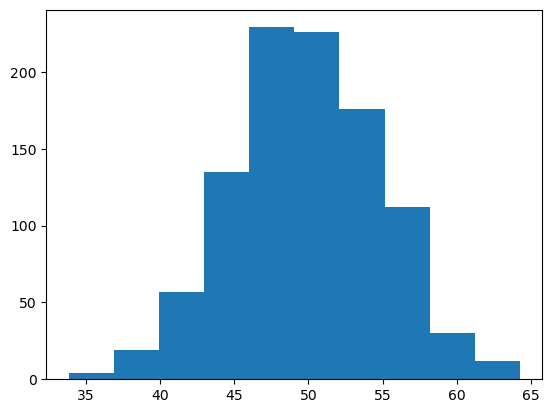

In [7]:
sample = normal(loc = 50, scale = 5, size = 1000) # mu = 50, sigma = 5
plt.hist(sample)
plt.show()

El siguiente paso es calcular una función teórica que se ajuste al conjunto de datos; para ello calculamos la media y la desviación estándar del conjunto de datos.

In [8]:
mu = sample.mean()
sigma = sample.std()

Con estos valores, se crea una instancia de un *norm* cuyos parámetros son precisamente mu y sigma, es decir, tenemos la base para aplicar la fórmula de la función de distribución normal, pero nos faltan los valores sobre los cuales vamos a calcular esas probabilidades. Entonces, primero se crea el objeto de la distribución normal y luego se genera un array cuyo rango va a variar entre los extremos de los datos reales y calculamos las probabilidades.

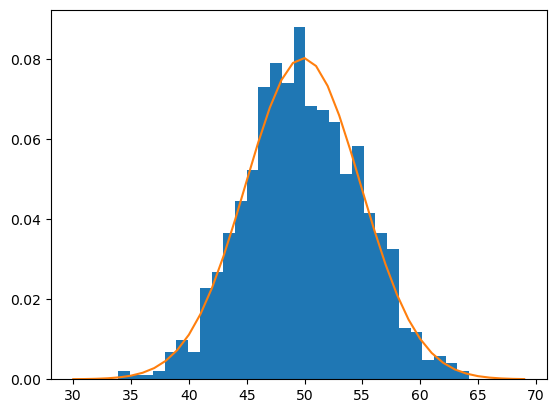

In [10]:
dist = norm(mu, sigma)
# Valores en el rango de los datos
values = [value for value in range(30, 70)]
# Utilizando la FDP se calcula la probabilidad asociada a cada valor
probabilidades = [dist.pdf(value) for value in values]
plt.hist(sample, bins = 30, density = True)
plt.plot(values, probabilidades)
plt.show()

## Estimación no paramétrica

Este proceso se aplica cuando el conjunto de datos no se ajusta a una distribución conocida así que no forzamos ajustar los datos a una única distribución sino a un conjunto de distribuciones.

Utilizaremos un método que ya viene incluído dentro de la librería de ScikitLearn, el cual se llama *Kernel Density Estimation*. Para ello, primero se simulan dos conjuntos de datos a través de dos funciones normales y se juntan en luego en una sola variable a través del método *hstack()*.

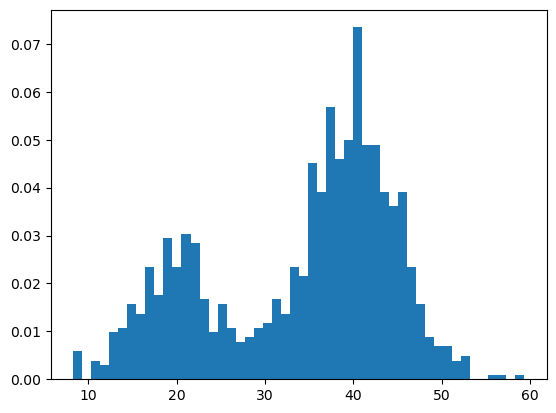

In [12]:
# mu = 20, sigma = 5
sample1 = normal(loc = 20, scale = 5, size = 300)

# mu = 40, sigma = 5
sample2 = normal(loc = 40, scale = 5, size = 700)

# Unimos los dos conjuntos en uno
sample = hstack((sample1, sample2))
plt.hist(sample, bins=50, density=True) 
plt.show()

Una vez que tenemos los datos simulados comienza el proceso de estimación; para ello se crea un objeto modelo el cual se instancia a través de los parámetros *bandwidth* (parámetro de suavizado) y *kernel* (funciones de distribución que se usan para la estimación). Esto es equivalente al método anterior, donde teníamos la función normal teórica y luego calculábamos las probabilidades, solo que ahora no tenemos solo una función de densidad de probabilidad sino un conjunto de distribuciones. Una vez creado el objeto se ajustan los datos a las necesidades del objeto; para esto se utiliza el método *reshape* el cual los ordena en una matriz de 1000 filas y 1 columna y luego se ajusta el modelo a estos datos con *fit*. 

In [13]:
model = KernelDensity(bandwidth = 2, kernel = 'gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=2)

A continuación se crea un array en el rango de los datos reales sobre cuales queremos estimar la función y luego calculamos las probabilidades.

El cálculo de forma logarítimica tiene que ver con la complejidad algorítmica, es una cuestión de eficiencia.

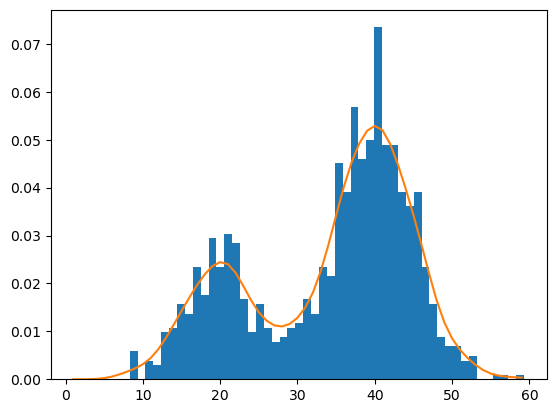

In [14]:
values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica para facilitar los calculos
probabilities = np.exp(probabilities)  # inversión de probabilidad obtenemos el valor original

plt.hist(sample, bins = 50, density = True) 
plt.plot(values[:], probabilities)
plt.show()